# Demonstration of Transformations
This series demonstrates the transformations used to diversify our image
set and get more image samples to train on.
***

## Import Modules

In [1]:
import cv2
import  math
import random
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageEnhance, ImageFilter


## Create Randomized Scaling Factor, and the Image Display Functions
This function takes a min value and max value, and returns a random uniform value between the min and max.

In [2]:
# demonstration of random uniform function
def random_uniform(min_val, max_val):
    random_number = random.random()
    value = max_val - min_val
    random_value = value * random_number
    result = min_val + random_value
    return result

# to avoid repeated lines when showing image
def show_image(img: Image):
    plt.imshow(img)
    plt.show()

## Load and Show Original Image

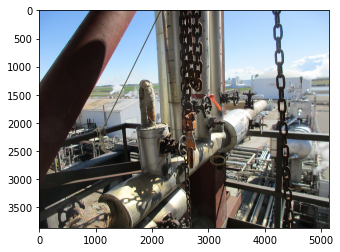

In [3]:
original_image = Image.open('F:/Python Projects/PyTorch-Valve-v1/model_pictures/originals_untagged/IMG_1914.JPG')
show_image(original_image)

## Brighten or Darken the Image

Brightness factor applied: 1.5


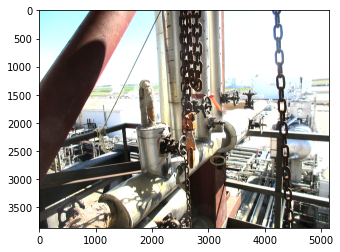

Brightness factor applied: 0.5


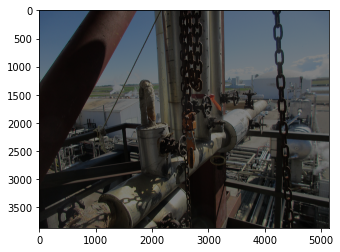

In [4]:
print('Brightness factor applied: 1.5')
transformation = ImageEnhance.Brightness(original_image)
output = transformation.enhance(1.5)
show_image(output)

print('Brightness factor applied: 0.5')
transformation = ImageEnhance.Brightness(original_image)
output = transformation.enhance(.5)
show_image(output)

## Blur the Image

Blur factor applied: 2


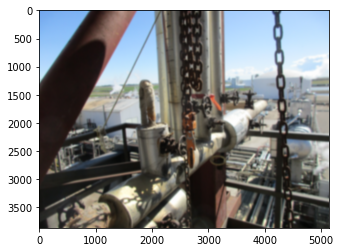

In [15]:
print('Blur factor applied: 2')
output = original_image.filter(ImageFilter.GaussianBlur(12))
show_image(output)


## Change Contrast

Contrast factor applied: 1.5


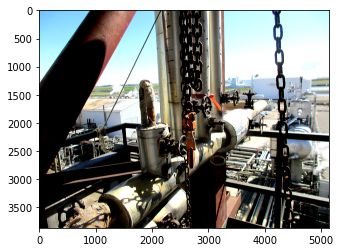

In [16]:
print('Contrast factor applied: 1.5')
transformation= ImageEnhance.Contrast(original_image)
output = transformation.enhance(1.5)
show_image(output)

## Sharpen the Image

Sharpen factor applied: 2


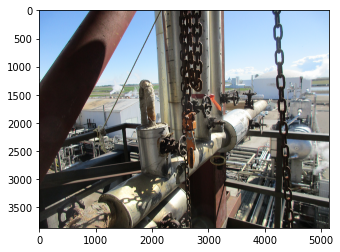

In [17]:
print('Sharpen factor applied: 2')
transformation = ImageEnhance.Sharpness(original_image)
output = transformation.enhance(2)
show_image(output)

## Randomly Pick & Apply a Flip

Flip factor applied: -1


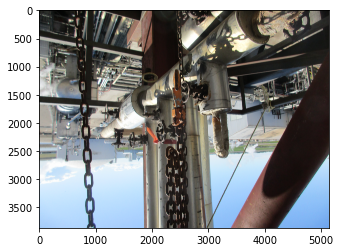

In [8]:
# Using cv2 for flip because it has an easier flip function that takes an integer
# as a parameter for what kind of flip.  Need to add an extra step to handle
# changing image types between Pillow and cv2

factor = random.choice([1, 0, -1])  # These are for horiz, vert, or both
print('Flip factor applied: ' + str(factor))
flipped_image = cv2.flip(np.array(original_image), factor)
output = Image.fromarray(flipped_image)
show_image(output)

## Rotate and Crop Image

Rotation Degrees: 112
Original Aspect Ration: 1.3333333333333333


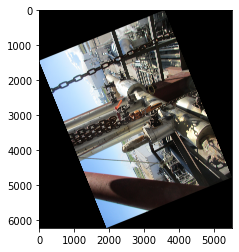

Rotated Aspect Ratio: 0.8856408609058786
Original Width and Height:  5152 3864
Rotated Width and Height:  5514 6226
Inscribed Rectangle Width and Height:  3198.3080099633116 2398.7310074724837


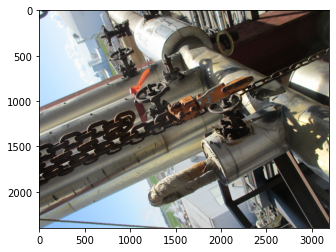

In [20]:
# rotate image random degrees between 10 and 350
degrees = random.randint(10, 350)
print('Rotation Degrees: ' + str(degrees))

# get original and rotated aspect ratios
aspect_ratio = original_image.width / original_image.height
print('Original Aspect Ration: ' + str(aspect_ratio))

rotated_image = original_image.rotate(degrees, expand=1)
show_image(rotated_image)
rotated_aspect_ratio = rotated_image.size[0] / rotated_image.size[1]
print('Rotated Aspect Ratio: ' + str(rotated_aspect_ratio))

# calculate the maximum rectangle possible to inscribe in a rotated rectangle
an = math.fabs(degrees) * math.pi / 180

if aspect_ratio < 1:
    total_height = original_image.size[0] / rotated_aspect_ratio
else:
    total_height = original_image.size[1]

h = total_height / (aspect_ratio * math.fabs(math.sin(an)) + math.fabs(math.cos(an)))
w = h * aspect_ratio
print('Original Width and Height: ', original_image.width, original_image.height)
print('Rotated Width and Height: ', rotated_image.width, rotated_image.height)
print('Inscribed Rectangle Width and Height: ', w, h)

# get crop coordinates & crop
x1 = (rotated_image.width - w) / 2
y1 = (rotated_image.height - h) / 2
x2 = rotated_image.width - x1
y2 = rotated_image.height - y1

output = rotated_image.crop((x1, y1, x2, y2))
show_image(output)

## Normalization

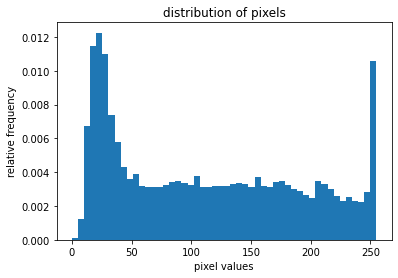

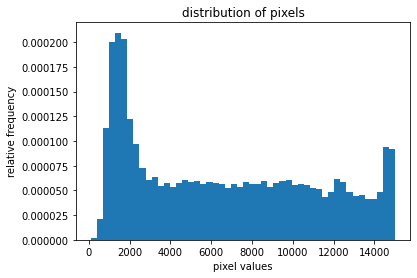

In [10]:
mean = 255 * np.array([0.485, 0.456, 0.406])
std = 255 * np.array([0.229, 0.224, 0.225])
image = np.array(original_image)

plt.hist(np.array(image).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels");
plt.show()

image = image.astype('float64')

image = std * image + mean

plt.hist(np.array(image).ravel(), bins=50, density=True);
plt.xlabel("pixel values")
plt.ylabel("relative frequency")
plt.title("distribution of pixels");
plt.show()




